In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data:

In [2]:
data = pd.read_csv("Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


EDA:

<ipython-input-3-ea96f5970d09>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

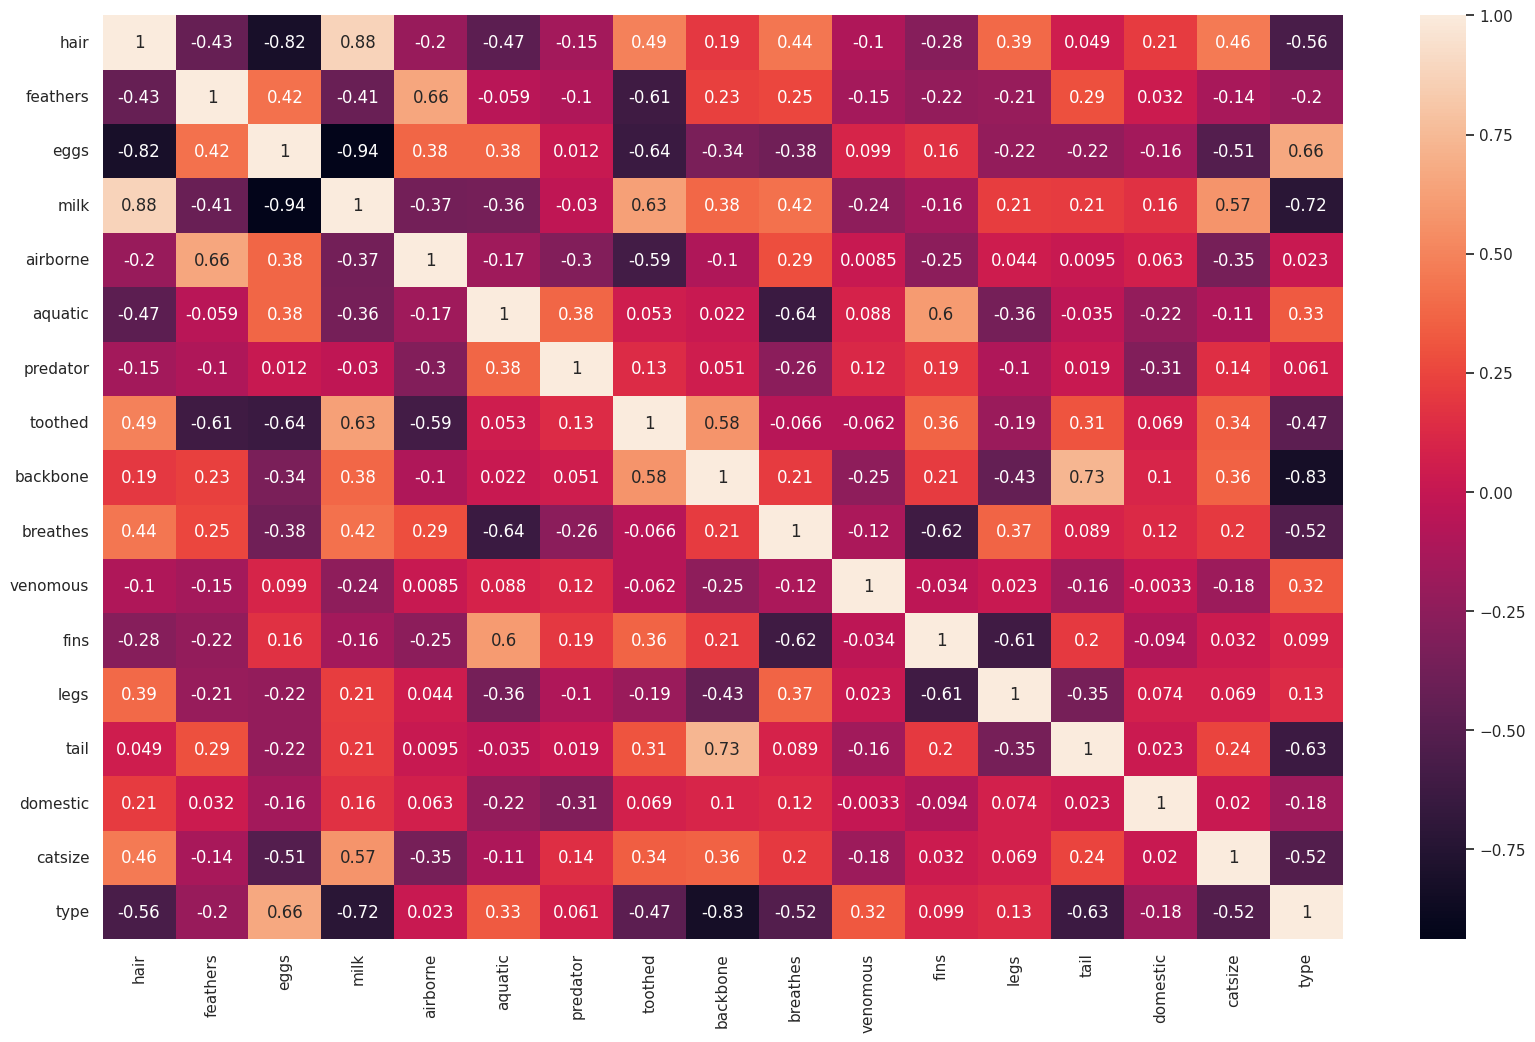

In [3]:
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(data.corr(), annot=True)

In [4]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

Preprocessing the data:

In [5]:
array = data.values
X = array[:,1:17]
Y = array[:,17]

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
Y = Y.astype(int)
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

Building the KNN model:

In [9]:
# Checking the square root of the length of the y_test to use the closest odd number as the value of K
total_types = len(data.type.unique())
total_types

7

In [10]:
# Finding how many categories are there in the y variable
np.sqrt(len(y_test))

4.58257569495584

In [11]:
model = KNeighborsClassifier(n_neighbors=3, p=7)
model.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=3, p=7)

Accuracy:

In [12]:
y_pred = model.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

,0,1,2,3,4,5,6
0,10,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,2,0,0,0
4,1,0,0,0,1,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,1,0,2


In [13]:
print(f"Accuracy: {round(model.score(X_test,y_test) * 100, 2)}%")

Accuracy: 71.43%


Grid Search for Algorithm Tuning:

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [16]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=4)
grid.fit(X, Y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [17]:
print(f"The best score is: {grid.best_score_}\nThe best value for K is: {grid.best_params_}")

The best score is: 0.9403846153846154
The best value for K is: {'n_neighbors': 5}


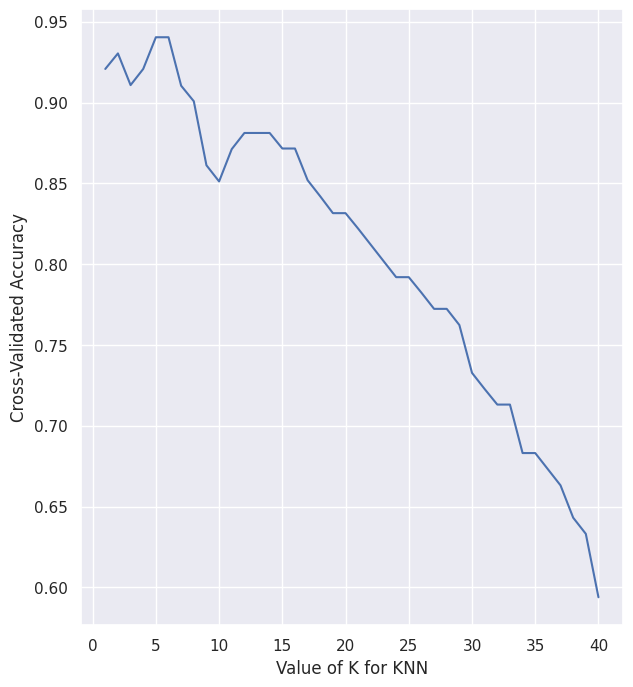

In [18]:
sns.set(rc={'figure.figsize':(7,8)})
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Observation: We can see that the optimal number of K is 5

Building a model with K as 5:

In [19]:
new_model = KNeighborsClassifier(n_neighbors=5)
new_model.fit(X_test,y_test)

KNeighborsClassifier()

In [20]:
print(f"Accuracy: {round(new_model.score(X_test,y_test) * 100, 2)}%")

Accuracy: 85.71%


In [21]:
y_pred = new_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6
0,11,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,2,0,0,0
4,0,0,0,0,2,0,0
5,1,0,0,0,0,0,0
6,0,0,0,0,0,0,3


Observation: The previous model gave us 76.19% accuracy and the new model with the optimum value of K = 1 gives us the accuracy of 80.95%